In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv('IMF_DATA_FINAL.csv')

In [5]:
df.head()

,country,Country id,Date,CRISIS,CAB_Y,EXP_G,STED_R,FXR_G,REER,CRISIS_1
0,Vietnam,1,1996Q4 [YR1996Q4],0,-8.192243,-0.034018,56.512545,0.311416,-3.239270,0
1,Vietnam,1,1997Q1 [YR1997Q1],0,-7.567235,0.017876,0.000000,0.154322,-1.729341,0
2,Vietnam,1,1997Q2 [YR1997Q2],0,-6.942227,-0.050835,43.500938,0.239375,-3.785391,0
3,Vietnam,1,1997Q3 [YR1997Q3],0,-6.317219,0.066105,0.000000,0.261656,2.282539,0
4,Vietnam,1,1997Q4 [YR1997Q4],0,-5.692211,0.000267,49.902958,0.143993,7.228432,0


In [34]:
df.tail()

,country,Country id,Date,CRISIS,CAB_Y,EXP_G,STED_R,FXR_G,REER,CRISIS_1
702,Indonesia,7,2020Q4 [YR2020Q4],0,-0.418751,0.162518,47.572808,0.046271,-0.642848,0
703,Indonesia,7,2021Q1 [YR2021Q1],0,-0.241757,0.647946,46.764614,0.136684,-1.408117,0
704,Indonesia,7,2021Q2 [YR2021Q2],0,-0.064763,0.534240,46.894671,0.042584,-2.083977,0
705,Indonesia,7,2021Q3 [YR2021Q3],0,0.112231,0.518651,42.583503,0.092785,-0.249324,0
706,Indonesia,7,2021Q4 [YR2021Q4],0,0.289224,0.381223,41.263278,0.069935,0.896908,0


In [6]:
df['CRISIS_1'].value_counts()

0    645
1     62
Name: CRISIS_1, dtype: int64

In [7]:
X = df[['CAB_Y', 'EXP_G','STED_R','FXR_G','REER']]
y = df['CRISIS_1']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=11)

In [9]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(X_train,y_train)

LogisticRegression()

In [14]:
yhat1_train=model1.predict(X_train)
yhat1_test=model1.predict(X_test)

Accuracy_in-sample performance:  0.9203539823008849


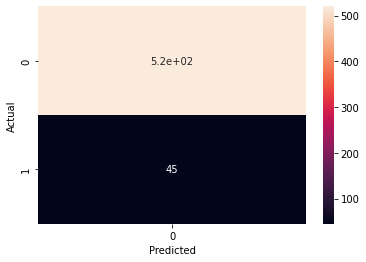

In [11]:
from sklearn import metrics
confusion_matrix = pd.crosstab(y_train, yhat1_train, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy_in-sample performance: ',metrics.accuracy_score(y_train, yhat1_train))
plt.show()

Accuracy_out-sample performance: 0.8802816901408451


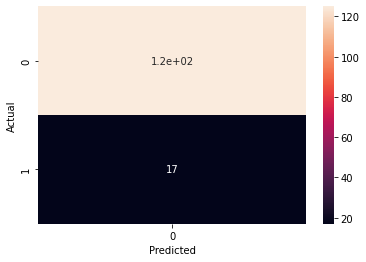

In [16]:
from sklearn import metrics
confusion_matrix = pd.crosstab(y_test, yhat1_test, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy_out-sample performance:',metrics.accuracy_score(y_test, yhat1_test))
plt.show()

In [17]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(X_train,y_train)

DecisionTreeClassifier()

In [18]:
yhat2_train=model2.predict(X_train)
yhat2_test=model2.predict(X_test)

Accuracy_in-sample performance:  1.0


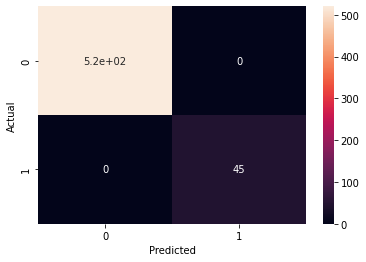

In [19]:
from sklearn import metrics
confusion_matrix = pd.crosstab(y_train, yhat2_train, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy_in-sample performance: ',metrics.accuracy_score(y_train, yhat2_train))
plt.show()

Accuracy_out-sample performance: 0.795774647887324


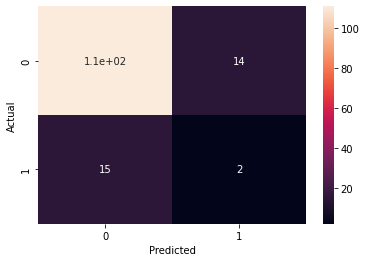

In [20]:
from sklearn import metrics
confusion_matrix = pd.crosstab(y_test, yhat2_test, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy_out-sample performance:',metrics.accuracy_score(y_test, yhat2_test))
plt.show()

In [21]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(n_estimators = 100)
model3.fit(X_train,y_train)

RandomForestClassifier()

In [22]:
yhat3_train=model3.predict(X_train)
yhat3_test=model3.predict(X_test)

Accuracy_in-sample performance:  1.0


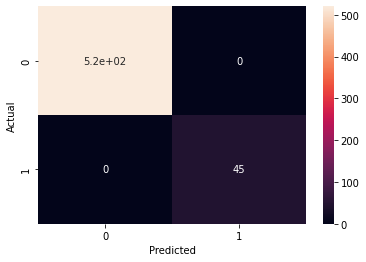

In [23]:
from sklearn import metrics
confusion_matrix = pd.crosstab(y_train, yhat3_train, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy_in-sample performance: ',metrics.accuracy_score(y_train, yhat3_train))
plt.show()

Accuracy_out-sample performance: 0.8661971830985915


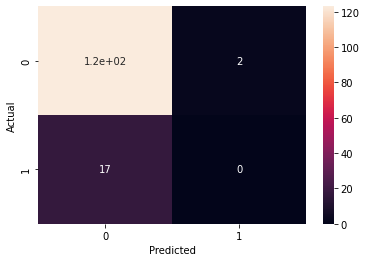

In [24]:
from sklearn import metrics
confusion_matrix = pd.crosstab(y_test, yhat3_test, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy_out-sample performance:',metrics.accuracy_score(y_test, yhat3_test))
plt.show()

In [26]:
print('1. Logit model')
print('- Accuracy_in-sample performance: ',metrics.accuracy_score(y_train, yhat1_train))
print('- Accuracy_out-sample performance:',metrics.accuracy_score(y_test, yhat1_test))
print('2. Decision Tree model')
print('- Accuracy_in-sample performance: ',metrics.accuracy_score(y_train, yhat2_train))
print('- Accuracy_out-sample performance:',metrics.accuracy_score(y_test, yhat2_test))
print('3. Random Forest model')
print('- Accuracy_in-sample performance: ',metrics.accuracy_score(y_train, yhat3_train))
print('- Accuracy_out-sample performance:',metrics.accuracy_score(y_test, yhat3_test))

1. Logit model
- Accuracy_in-sample performance:  0.9203539823008849
- Accuracy_out-sample performance: 0.8802816901408451
2. Decision Tree model
- Accuracy_in-sample performance:  1.0
- Accuracy_out-sample performance: 0.795774647887324
3. Random Forest model
- Accuracy_in-sample performance:  1.0
- Accuracy_out-sample performance: 0.8661971830985915


In [ ]:
#FXR_G: the annual growth rate in foreign exchange reserves
#STED_R: the ratio between short-term external debt and reserves
#CAB_Y: the current account balance as a percentage of GDP
#REER: a measure of real effective exchange rate misalignment (HP-filtered)
#EXP_G: the annual growth rates of exports

In [37]:
FXR_G = float(input("The annual growth rate in foreign exchange reserves: "))
STED_R = float(input("The ratio between short-term external debt and reserves"))
CAB_Y = float(input("The current account balance as a percentage of GDP"))
REER = float(input("The real effective exchange rate misalignment"))
EXP_G = float(input("The annual growth rates of exports"))
X_predict = [[CAB_Y,EXP_G,STED_R,FXR_G,REER]]
crisis_predict = model3.predict(X_predict)
if crisis_predict == 0:
  print("No crisis warning for the country!")
else:
  print("Crisis warning for the country!")

The annual growth rate in foreign exchange reserves: 9
The ratio between short-term external debt and reserves0
The current account balance as a percentage of GDP0
The real effective exchange rate misalignment0
The annual growth rates of exports0
No crisis warning for the country!
